# Pandas DataFrame for storing tweet feed (total 12 points)

Creating following date frame for storing tweets

- **climate_feed_df** DataFrame for storing tweet
- **retweeted_status_df** for storing original tweet

In [2]:
import pandas as pd
import numpy as np
import nltk
import re
import requests
from bs4 import BeautifulSoup as bsp
import ast
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

--2022-05-15 10:10:31--  https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/psnegi/data_science_tools1/master/hws/retweeted_status_df.pkl [following]
--2022-05-15 10:10:31--  https://raw.githubusercontent.com/psnegi/data_science_tools1/master/hws/retweeted_status_df.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8002::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13793850 (13M) [application/octet-stream]
Saving to: ‘retweeted_status_df.pkl’

retweeted_status_df 100%[===================>]  13.15M  13.7MB/s    in 1.0s    

2022-05-15 10:10:32 (13.

In [4]:
!wget https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

--2022-05-15 10:10:33--  https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/psnegi/data_science_tools1/master/hws/climate_feed.pkl [following]
--2022-05-15 10:10:33--  https://raw.githubusercontent.com/psnegi/data_science_tools1/master/hws/climate_feed.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8002::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9122192 (8.7M) [application/octet-stream]
Saving to: ‘climate_feed.pkl’

climate_feed.pkl    100%[===================>]   8.70M  12.5MB/s    in 0.7s    

2022-05-15 10:10:34 (12.5 MB/s) - ‘climate_feed.pkl’

<font color= "red">Click on these links if the above downloads fail. </font>


https://github.com/psnegi/data_science_tools1/raw/master/hws/climate_feed.pkl

https://github.com/psnegi/data_science_tools1/raw/master/hws/retweeted_status_df.pkl

Keep these pkl file in the same directory as notebook

In [5]:
retweeted_status_df = pd.read_pickle("./retweeted_status_df.pkl")

In [6]:
retweeted_status_df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,scopes,source,text,truncated,user
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,None,Sat Feb 09 20:27:45 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,99.0,False,None,1.094332e+18,1094332044052549633,...,NaN,NaN,NaN,81.0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",The National Party declares war on the Glouces...,True,"{'default_profile': False, 'protected': False,..."
2,NaN,None,Sat Feb 09 23:56:18 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,6.0,False,None,1.094385e+18,1094384528267902977,...,"{'favorited': False, 'favorite_count': 2642, '...",1.093999e+18,1093998640392220673,5.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",This is the same idiot who thought\nThe southe...,False,"{'default_profile': False, 'protected': False,..."
3,NaN,None,Sat Feb 09 23:34:27 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,190.0,False,None,1.094379e+18,1094379028608438272,...,"{'favorited': False, 'favorite_count': 220, 'i...",1.093932e+18,1093931686998487040,31.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",Communism is Fascism. Fighting Climate Change ...,True,"{'default_profile': False, 'protected': False,..."
4,NaN,None,Sat Feb 09 19:07:56 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,2905.0,False,None,1.094312e+18,1094311957669265408,...,NaN,NaN,NaN,599.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Unmitigated climate change would literally des...,True,"{'default_profile': True, 'protected': False, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,NaN,None,Sat Feb 09 20:56:39 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,1.0,False,None,1.094339e+18,1094339317324017665,...,NaN,NaN,NaN,1.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",72% of Americans are 'very worried' about clim...,False,"{'default_profile': True, 'protected': False, ..."
9995,NaN,None,Thu Feb 07 20:27:55 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,3491.0,False,None,1.093607e+18,1093607309606076416,...,NaN,NaN,NaN,482.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",@JFaurall @MgBenchjeweler @SpeakerPelosi Calif...,True,"{'default_profile': True, 'protected': False, ..."
9996,NaN,None,Sat Feb 09 18:33:00 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,12586.0,False,None,1.094303e+18,1094303164805799936,...,NaN,NaN,NaN,2801.0,False,NaN,"<a href=""https://about.twitter.com/products/tw...",President Trump believes we should listen to f...,True,"{'default_profile': False, 'protected': False,..."
9997,NaN,None,Fri Feb 08 22:15:50 +0000 2019,"{'hashtags': [], 'user_mentions': [], 'urls': ...",NaN,4249.0,False,None,1.093997e+18,1093996855111966720,...,"{'favorited': False, 'favorite_count': 551, 'i...",1.093893e+18,1093893115633647616,642.0,False,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Wait til he hears how much climate change is g...,False,"{'default_profile': False, 'protected': False,..."


In [7]:
#climate_feed_df.to_pickle("./climate_feed.pkl")
climate_feed_df = pd.read_pickle("./climate_feed.pkl")
climate_feed_df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user_id
0,None,None,Sun Feb 10 00:17:31 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389867499405313,1094389867499405313,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",.@SteveKingIA says he's unsure about the scien...,True,31476142
1,None,None,Sun Feb 10 00:17:30 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389862193455105,1094389862193455105,...,NaN,NaN,NaN,81,False,1.094332e+18,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",RT @RobOakeshott1: The National Party declares...,False,996782298
2,None,None,Sun Feb 10 00:17:26 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389844078485506,1094389844078485506,...,NaN,1093998640392220673,1093998640392220673,5,False,1.094385e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @emilia_suze: This is the same idiot who th...,False,45333453
3,None,None,Sun Feb 10 00:17:24 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389837522599936,1094389837522599936,...,NaN,1093931686998487040,1093931686998487040,31,False,1.094379e+18,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @PrettyBadLefty: Communism is Fascism. Figh...,False,1020067726532829185
4,None,None,Sun Feb 10 00:17:23 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094389831419994112,1094389831419994112,...,NaN,NaN,NaN,599,False,1.094312e+18,"<a href=""http://twitter.com/download/android"" ...",RT @kenklippenstein: Unmitigated climate chang...,False,19889325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,None,None,Sat Feb 09 20:57:54 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094339630500012033,1094339630500012033,...,NaN,NaN,NaN,1,False,1.094339e+18,"<a href=""http://twitter.com/download/android"" ...",RT @fromhello2hello: 72% of Americans are 'ver...,False,888112320097918976
9995,None,None,Sat Feb 09 20:57:54 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094339629107400704,1094339629107400704,...,NaN,NaN,NaN,482,False,1.093607e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @stuntdaddy_42: @JFaurall @MgBenchjeweler @...,False,3324836714
9996,None,None,Sat Feb 09 20:57:53 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094339627316641794,1094339627316641794,...,NaN,NaN,NaN,2801,False,1.094303e+18,"<a href=""http://twitter.com/download/android"" ...",RT @SenSanders: President Trump believes we sh...,False,1487109794
9997,None,None,Sat Feb 09 20:57:51 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,None,1094339619569557504,1094339619569557504,...,NaN,1093893115633647616,1093893115633647616,642,False,1.093997e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @KateAronoff: Wait til he hears how much cl...,False,4737089913


Here are dtypes for climate_feed_df. We'll work with only
- entities to extract hashtags
- retweeted_status in case we need to extract original full tweet
- truncated
- text: tweet text
- created_at
- user_id

Some of them have wrong datatypes.

In [8]:
climate_feed_df.dtypes

contributors                  object
coordinates                   object
created_at                    object
entities                      object
extended_entities             object
favorite_count                object
favorited                     object
geo                           object
id                            object
id_str                        object
in_reply_to_screen_name       object
in_reply_to_status_id         object
in_reply_to_status_id_str     object
in_reply_to_user_id           object
in_reply_to_user_id_str       object
is_quote_status               object
lang                          object
metadata                      object
place                         object
possibly_sensitive            object
quoted_status                 object
quoted_status_id              object
quoted_status_id_str          object
retweet_count                 object
retweeted                     object
retweeted_status             float64
source                        object
t

# Q1 (points .5) replace None with nan in climate_feed_df. Also display some random rows.


In [9]:
# write code here
"""replacement of None with nan"""
climate_feed_df.replace('None', None, inplace=True)
climate_feed_df.fillna(value=np.nan, inplace=True)
climate_feed_df.isin(['None', None]).sum().sum()

0

In [10]:
"""
display random rows
"""
climate_feed_df.sample(n=10)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user_id
4961,NaN,NaN,Sat Feb 09 22:37:01 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094364573732352000,1094364573732352000,...,NaN,NaN,NaN,22,False,1.094361e+18,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @agraybee: I don’t want to seem like I’m gl...,False,1083100191580999682
2364,NaN,NaN,Sat Feb 09 23:32:42 +0000 2019,"{'hashtags': [{'indices': [17, 37], 'text': 'C...",NaN,0,False,NaN,1094378588164575233,1094378588164575233,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",@realDonaldTrump #ClimateChangeIsReal really ...,True,827596642807382020
1009,NaN,NaN,Sat Feb 09 23:57:26 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094384810448048128,1094384810448048128,...,NaN,NaN,NaN,386,False,1.093915e+18,"<a href=""http://twitter.com/download/android"" ...",RT @allahpundit: Is AOC’s proposal going to ge...,False,1087334594502889472
6246,NaN,NaN,Sat Feb 09 22:11:23 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094358123773652994,1094358123773652994,...,NaN,NaN,NaN,0,False,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@willysmets @GerritHiemstra Nog leuker is eige...,True,227488865
5104,NaN,NaN,Sat Feb 09 22:33:58 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094363807776817152,1094363807776817152,...,NaN,NaN,NaN,217,False,1.094055e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @thenation: A sober reading of the latest c...,False,758042170968375296
7108,NaN,NaN,Sat Feb 09 21:53:31 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094353628708646913,1094353628708646913,...,NaN,NaN,NaN,83,False,1.094138e+18,"<a href=""http://twitter.com/download/android"" ...",RT @Noahpinion: Any climate change plan that d...,False,881513070
9960,NaN,NaN,Sat Feb 09 20:58:37 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094339813040365569,1094339813040365569,...,NaN,NaN,NaN,40,False,1.094319e+18,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","RT @MichaelEMann: ""Earth's coldest years on re...",False,102157523
3814,NaN,NaN,Sat Feb 09 23:02:54 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094371089969541120,1094371089969541120,...,NaN,NaN,NaN,44,False,1.094343e+18,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","RT @ptcherneva: Exactly, because orthoodoxy ha...",False,329221989
7682,NaN,NaN,Sat Feb 09 21:43:08 +0000 2019,"{'hashtags': [{'indices': [135, 139], 'text': ...",NaN,0,False,NaN,1094351014939942912,1094351014939942912,...,NaN,NaN,NaN,119,False,1.094316e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @hellofromtiff: I have been praying for thi...,False,706991954408550400
4197,NaN,NaN,Sat Feb 09 22:55:26 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,0,False,NaN,1094369207171629056,1094369207171629056,...,NaN,NaN,NaN,178,False,1.094296e+18,"<a href=""http://twitter.com/download/android"" ...","RT @FiveThirtyEight: In the spring of 2015, 63...",False,938464475102969856


Working with only selected attributes.

In [11]:
climate_feed_df = climate_feed_df[['created_at', 'entities','retweeted_status', 'truncated', 'user_id', 'text' ]].copy()

In [12]:
climate_feed_df.sample(10)

,created_at,entities,retweeted_status,truncated,user_id,text
2409,Sat Feb 09 23:31:48 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.093783e+18,False,707860615017041920,RT @richardbranson: Well worth reading David W...
1648,Sat Feb 09 23:45:36 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094057e+18,False,381321733,"RT @philipaklein: Yes, because we cannot addre..."
8203,Sat Feb 09 21:32:10 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094212e+18,False,113133845,RT @marklevinshow: The insane Democrat Left. ...
4075,Sat Feb 09 22:58:09 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094303e+18,False,1535125777,RT @SenSanders: President Trump believes we sh...
5329,Sat Feb 09 22:29:35 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.093997e+18,False,883860320560795648,RT @KateAronoff: Wait til he hears how much cl...
6487,Sat Feb 09 22:06:24 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094351e+18,False,1915833337,"RT @TianaTheFirst: ""I'm a champion of the TSA,..."
8769,Sat Feb 09 21:20:52 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094303e+18,False,869274946937253889,RT @SenSanders: President Trump believes we sh...
2145,Sat Feb 09 23:36:25 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094209e+18,False,16471647,RT @jeffreyatucker: Not even the worst possibl...
1874,Sat Feb 09 23:41:49 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094303e+18,False,816422810415403010,RT @SenSanders: President Trump believes we sh...
2168,Sat Feb 09 23:36:06 +0000 2019,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094303e+18,False,801265340634251265,RT @SenSanders: President Trump believes we sh...


# Q2 (points .5 =.25+.25) convert
- created_at to date time type
- truncated to bool type.


In [13]:
"""
prior to conversion
"""
climate_feed_df.dtypes

created_at           object
entities             object
retweeted_status    float64
truncated            object
user_id               int64
text                 object
dtype: object

In [14]:
# write code here
"""
conversion
"""
climate_feed_df['created_at'] = pd.to_datetime(climate_feed_df['created_at'])
climate_feed_df.replace({'True' : True, 'False' : False}, inplace=True)

Checking datatype again

In [15]:
"""following conversion"""
climate_feed_df.dtypes

created_at          datetime64[ns, UTC]
entities                         object
retweeted_status                float64
truncated                          bool
user_id                           int64
text                             object
dtype: object

# Q3(points .5) In climate_feed_df, calculate the number of NAN values in various columns

In [16]:
# write code here
"""calculate NaN for each dataframe column"""
climate_feed_df.isna().sum()

created_at             0
entities               0
retweeted_status    2690
truncated              0
user_id                0
text                   0
dtype: int64

We'll use **ast** module to parse string to python dictionary

# Q4(points 1=.5+.5) Using *ast* module  convert entities to python dictionary. This dictionary should contain hashtags and user_mentions
 - Create a columns named hashtags. Values in this columns should be command separated values of **text** attribute in **hashtags**  value.
 - Create a columns named user_mentions.Values in this columns should be command separated values of **name** attribute in **user_mentions** values.

In [17]:
# write code here
"""convert string representation of Dict to object then transform to dataframe cols"""
objects = climate_feed_df['entities'].apply(ast.literal_eval)
hashtags = objects.apply(lambda x : x['hashtags'])
user_mentions = objects.apply(lambda x : x['user_mentions'])
climate_feed_df['hashtags'] = hashtags.apply(lambda lst : ", ".join([x['text'] for x in lst]))
climate_feed_df['user_mentions.Values'] = user_mentions.apply(lambda lst : ", ".join([x['name'] for x in lst]))
climate_feed_df.head()

,created_at,entities,retweeted_status,truncated,user_id,text,hashtags,user_mentions.Values
0,2019-02-10 00:17:31+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",NaN,True,31476142,.@SteveKingIA says he's unsure about the scien...,,Steve King
1,2019-02-10 00:17:30+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094332e+18,False,996782298,RT @RobOakeshott1: The National Party declares...,,Rob Oakeshott
2,2019-02-10 00:17:26+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094385e+18,False,45333453,RT @emilia_suze: This is the same idiot who th...,,Suze Michelini
3,2019-02-10 00:17:24+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094379e+18,False,1020067726532829185,RT @PrettyBadLefty: Communism is Fascism. Figh...,,Chad Vigorous
4,2019-02-10 00:17:23+00:00,"{'hashtags': [], 'user_mentions': [{'id_str': ...",1.094312e+18,False,19889325,RT @kenklippenstein: Unmitigated climate chang...,,Ken Klippenstein


# Cleaning tweets

Let's see some random tweets

In [18]:
tweet_length= 280
pd.set_option('max_colwidth', 2*tweet_length)
climate_feed_df['text'].sample(100)

6876                                  RT @alexanderbruz: Happy Saturday! Friendly reminder that climate change is a hoax! \n\nHave a great day everyone!
4458                     RT @nathan_wrench: Rewilding is essential to the UK's commitments on climate change https://t.co/WI6TPwrOk2 via @ConversationUK
3565        RT @marklevinshow: The insane Democrat Left.  “Climate change” was always the political pathway drug to fundamentally destroying our free s…
6775      RT @SenSanders: President Trump believes we should listen to fossil fuel executives and ignore climate change. \n\nI believe we should listen…
2489                                                                Climate Change Solutions Emerge through Collective Action... https://t.co/40OJhMsJ0q
                                                                              ...                                                                       
3493                                  RT @alexanderbruz: Happy Saturday! Friendly 

**Example of tweet not truncated**

In [19]:
climate_feed_df['text'].loc[3929]

'Fighting climate change without nuclear is a fool’s errand. https://t.co/KPSCk6fjsa'

**Exampe of tweet truncated**

In [20]:
climate_feed_df['text'].loc[3928]

'RT @_Oliver_Yates: If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fighting f…'

Truncated tweet has three horizontal ellipses in it. One can check retweeted_status values and 
use it got the the original tweet text

In [21]:
climate_feed_df.retweeted_status.loc[3928]

1.0943594112863928e+18

In [22]:
retweeted_status_df[retweeted_status_df.id == climate_feed_df.retweeted_status.loc[3928]].text.iloc[0]

'If only Abbott could fight as hard for the safety of our country from the impacts of climate change, as he is fight… https://t.co/OJlsDeFoNA'

There is url above tweet. We can use **requests** to get the complete text.



# Q5(points 3.5= 1(use of requests and text extraction from right html element)+.5+1+1 ) Perform following activities for creating a new original_tweet_text field in climate_feed_df. 

- If  climate_feed_df has a valid retweeted_status(**it is an id of the record in retweeted_status_df** ), then use retweeted_status_df to get the original text(**retweeted_status_df.text**) otherwise use None(**Ignore the value of climate_feed_df.truncated field for this activity.**).
    + If retweeted_status_df.text has a URL(like https://t.co/RKyppIS5c9 ), use it to get complete text from right html element. 
    
    *If you have a way to figure out that one is not supposed to web scrap this URL don't scrap it.*
    
- Create a new field named **original_tweet_text** in climate_feed_df to store the text extracted from URL(use None if requests to URL fails or any other issues.). Use retweeted_status_df.text if there was no 
 URL.
- From  newly original_tweet_text field remove
    - one or more \n with .(dot)
    - any url(http, https)
    - @user, @user:

*Note that as you will be making a lot of requests call(I/O bound calls), this portion of code can be slow. you may want to test your code on a small number of records first.*

In [23]:
# Write code here
"""
Using alternative dataframe provided (q_5data). Will rename climate_feed_df and proceed accordingly
remove usng pd.replace and regex
"""
climate_feed_df = pd.read_pickle("./q5_dataframe.pkl")
climate_feed_df['original_tweet_text'] = \
climate_feed_df['original_tweet_text'].replace(r'\n*', '', regex=True)
climate_feed_df['original_tweet_text'] = \
climate_feed_df["original_tweet_text"].replace(r'https?:\/\/.*[\r\n]*', '', regex=True)
climate_feed_df['original_tweet_text'] = \
climate_feed_df['original_tweet_text'].replace(r'@\S*\s', '', regex=True)
climate_feed_df['original_tweet_text'] = \
climate_feed_df['original_tweet_text'].str.strip()

# Q 6(point 1= .5+.5) Remove all the reference  of RT and  @user: or @user, and url in climate_feed_df text attribute.

In [24]:
# write code here
"""remove usng pd.replace and regex"""
climate_feed_df['text'] = \
climate_feed_df['text'].replace(r'\n*', '', regex=True)
climate_feed_df['text'] = \
climate_feed_df['text'].replace(r'RT*', '', regex=True)
climate_feed_df['text'] = \
climate_feed_df['text'].replace(r'https?:\/\/.*[\r\n]*', '', regex=True)
climate_feed_df['text'] = \
climate_feed_df['text'].replace(r'@\S*\s', '', regex=True)
climate_feed_df['text'] = \
climate_feed_df['text'].str.strip()

# Q 7 (2 point) Create a new attribute in climate_feed_df named *final_tweet_text*. If *original_tweet_text* is None  then use climate_feed_df.text otherwise use *original_text_tweet* if initial words matched with *climate_feed_df.text* words. If words doesn't match use climate_feed_df.text

Note that some time after fetching text from a url based on retweeted_status_df.text, we may get different text. We can fix it but for this homework we are ignoring it.

In [25]:
# wite code here
"""
I read this question as follows: if climate_feed_df[original_tweet_text] is equal to climate_feed_df[text] 
then use climated_feed_df[original_tweet_text], else use climate_feed_df[text]
"""
conditions = [
    (climate_feed_df['original_tweet_text'] == climate_feed_df['text']),
    (climate_feed_df['original_tweet_text'] != climate_feed_df['text'])
]
values = [climate_feed_df['original_tweet_text'], climate_feed_df['text']]
climate_feed_df['final_tweet_text'] = np.select(conditions, values)

# Emoji detection

See this example of emoji as unicode characters

In [26]:
climate_feed_df['final_tweet_text'].loc[3931]

'Oh my god, CABON.......😱😱😱 Cue the outrage machine against smartphone. These things are adding to climate change.'

We can use use regex to capture this emji

https://apps.timwhitlock.info/emoji/tables/unicode


In [27]:
emoji_regex = re.compile(r"😱", re.UNICODE)

In [28]:
emoji_regex.findall(climate_feed_df['final_tweet_text'].loc[3931])

['😱', '😱', '😱']

In [29]:
"""string comparison is valid for emojis"""
print('😱' == '😱')

True


In [30]:
emoji_regex = re.compile(r"U1F64C", re.UNICODE)

We'll use emoji library to make this task easier.

Here is some documentation about unicode support in python

https://docs.python.org/3/howto/unicode.html

In [31]:
#! pip install emoji

In [32]:
import emoji

In [33]:
emoji.UNICODE_EMOJI

{'en': {'🥇': ':1st_place_medal:',
  '🥈': ':2nd_place_medal:',
  '🥉': ':3rd_place_medal:',
  '🆎': ':AB_button_(blood_type):',
  '🏧': ':ATM_sign:',
  '🅰️': ':A_button_(blood_type):',
  '🅰': ':A_button_(blood_type):',
  '🇦🇫': ':Afghanistan:',
  '🇦🇱': ':Albania:',
  '🇩🇿': ':Algeria:',
  '🇦🇸': ':American_Samoa:',
  '🇦🇩': ':Andorra:',
  '🇦🇴': ':Angola:',
  '🇦🇮': ':Anguilla:',
  '🇦🇶': ':Antarctica:',
  '🇦🇬': ':Antigua_&_Barbuda:',
  '♒': ':Aquarius:',
  '🇦🇷': ':Argentina:',
  '♈': ':Aries:',
  '🇦🇲': ':Armenia:',
  '🇦🇼': ':Aruba:',
  '🇦🇨': ':Ascension_Island:',
  '🇦🇺': ':Australia:',
  '🇦🇹': ':Austria:',
  '🇦🇿': ':Azerbaijan:',
  '🔙': ':BACK_arrow:',
  '🅱️': ':B_button_(blood_type):',
  '🅱': ':B_button_(blood_type):',
  '🇧🇸': ':Bahamas:',
  '🇧🇭': ':Bahrain:',
  '🇧🇩': ':Bangladesh:',
  '🇧🇧': ':Barbados:',
  '🇧🇾': ':Belarus:',
  '🇧🇪': ':Belgium:',
  '🇧🇿': ':Belize:',
  '🇧🇯': ':Benin:',
  '🇧🇲': ':Bermuda:',
  '🇧🇹': ':Bhutan:',
  '🇧🇴': ':Bolivia:',
  '🇧🇦': ':Bosnia_&_Herzegovina:',
  '🇧🇼': ':Botsw

# Q 8(1 point) Create a column  called *emoji*.  This coumns should contains a list of tuples for emoji detected in *final_tweet_text*. First element of tuple is the emoji detected and second is the text describing the emoji.

In [34]:
# write code here
"""returning only english "en" descritption of mathching emojis in emoji.UNICODE_EMOJI"""
def pull_emoji(text):
    
    emojis = [(c, emoji.UNICODE_EMOJI['en'][c]) for c in text if \
              c in emoji.UNICODE_EMOJI['en'].keys()]
    
    return emojis
    
climate_feed_df['emoji'] = climate_feed_df.final_tweet_text.apply(pull_emoji)

# We'll use wordcloud  to do elemetary exploratory data analysis(EDA). We'll do some cleanup before using wordcloud.

https://github.com/amueller/word_cloud

In [35]:
#!pip install wordcloud

In [36]:
%matplotlib inline

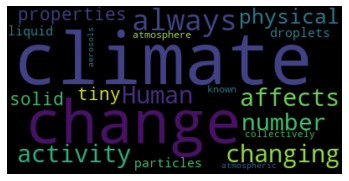

In [37]:
# here is a sample
text = "climate change. Climate is always changing. Human activity also affects climate through changes in the number and physical properties of tiny solid particles and liquid droplets in the atmosphere, known collectively as atmospheric aerosols"
wordcloud = WordCloud().generate(text)
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As you can see word size is proportional to frequency of a word and highlight the main keywords in a text.
This gives an idea about the content of the  text.

We can do all the text pre processing or wrangling
 like 

- More Cleaning
- Case conversion
- Spell correction
- Expanding contractions
- Removing stop words
- Morphological normalization
    - Stemming
    - Lemmatization


But for this homework we'll only **do expanding contractions,  stop words removal,  and lemmatization**

# Q 9 (2 = .5+.5+.5+.5 points) Do
- expanding contractions
- stop words removal
- lemmatization
- Use wordcloud to visualize keywords

In [38]:
# write code here
# I have include a sample output. Your output can be different 
final_text = []
# instantiate lemmatizer
lemma = WordNetLemmatizer()
# get stop wods from NLTK
stop_words = set(stopwords.words('english')) 
for text in climate_feed_df.final_tweet_text:
    text = re.sub(r'n[’\'’]t', ' not', text)
    text = re.sub(r'[’\'’]s', ' is', text)
    text = re.sub(r'you\'re', 'you are', text)
    text = re.sub(r'[\.,…\?!:#]', '', text)
    words = word_tokenize(text)
    words = [lemma.lemmatize(w) for w in words if not w.lower() in stop_words]
    final_text.extend(words)
final_text = ' '.join(final_text)

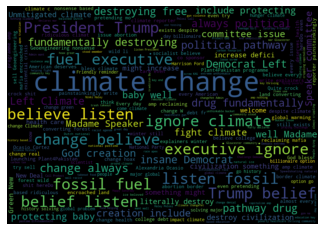

In [39]:
"""create word cloud from final text"""
wordcloud = WordCloud(width=1000, height=700).generate(final_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Homework ends
# Final thoughts
He haven't done all the cleanup or used all the attributes for EDA.I just want to highlight one more clean up activity related to language.

In [40]:
import enchant

In [41]:
dictionary = enchant.Dict('en')

In [42]:
climate_feed_df['text'].loc[5217]

'去LACMA那么多次，都没意识到旁边的Tar Pits是啥…一直以为是摆几个造型给小朋友们玩的公园…站在千年前的point看千年后的楼宇车辆，再一想climate change，千年后人类可能也不存在了就觉得——有点兴奋'

In [44]:
[dictionary.check(w) for w in  nltk.word_tokenize(climate_feed_df['text'].loc[5217])]

[False, False, False]